# Ансамблирование алгоритмов

![Ансамбль](img/ansamble.jpg)

**Ансамбль (Ensemble, Multiple Classifier System)** называется алгоритм, который состоит из нескольких алгоритмов машинного обучения, а процесс построения ансамбля называется ансамблированием (ensemble learning). 

Простейший пример ансамбля в регрессии – усреднение нескольких алгоритмов:

$$ \hat{y}(X) = \frac{1}{n}\{ model_{1}(X) + ... +  model_{n}(X) \} $$

Алгоритмы $ model_i(X) $ - базовые алгоритмы.

$$ \hat{y}(x) = mode(model_{1}(X), ... , model_{n}(X)) $$

где  `mode` – мода.

Обучаем несколько базовых моделей, а затем агрегируем их результаты по какому-либо правилу и выдаем окончательный результат.

Зачем это нужно:

* В совокупности получаем более сложную модель, чем каждая в отдельности
* Избежание переобучения/недообучения
* Возможность работы с признаками разной природы (использовать разные алгоритмы)

Для простоты рассмотрим задачу бинарной классификации. Пусть всего $N$ базовых моделей и каждая предсказывает класс $c_{1}$ или $c_{2}$. Тогда агрегированный алгоритм может выдавать класс $c_{1}$ по следующим правилам:

* AND-правило: если все базовые модели выдали $c_{1}$
* OR-правило: если хотя бы одна базовая модель выдала $c_{1}$
* $k-out-of-N$: если хотя бы $k$ базовых моделей из $N$ выдали $c_{1}$
* majority vote: если большинство базовых моделей выдало $c_{1}$

### Обобщение с весами
Также, если используются правила $k-out-of-N$ или majority vote, можно каждой базовой модели присвоить вес, основываясь на качестве предсказания на валидационной выборке.

### Предсказание класса по уровням ранжирования
Пусть теперь рассматривается задачи многоклассовой классификации с $C$ классами. Пусть каждая $k$-ая базовая модель выдает некую отранжированную информацию о классе объекта:

$c_{k_{1}} \succeq c_{k_{2}} \succeq \dots \succeq c_{k_{C}}$

Это означает, что класс $c_{k_{1}}$ наиболее вероятен для рассматриваемого объекта, а класс {\displaystyle c_{k_{C}}} --- наименее вероятен.

Пусть $B_{k}(i)$ - сколько классов было отранжировано ниже $i$-го класса $k$-ой базовой моделью. Чем $B_{k}(i)$ выше, тем более вероятен $i$-ый класс. Поэтому, в качестве совокупного рейтинга построим следующую величину:

$g_{i}(x)=\sum \limits_{k}B_{k}(i,x)$

Тогда результирующее предсказание на объекте $x$:

${\hat {y}}(x)={\underset {i\in [1,\dots ,C]}{\operatorname {argmax} }}~~g_{i}(x)$

### Предсказание класса по вероятностям
Опять рассмотрим задачу многоклассовой классификации с $C$ классами. Пусть каждая $k$-ая базовая модель выдает вектор вероятностей из принадлежностей к каждому классу:

$[p^{k}(c_{1}),p^{k}(c_{2}),\dots ,p^{k}(c_{C})]$

Тогда ${\hat {y}}(x)=c_{i}$, где $i={\underset {i\in [1,\dots ,C]}{\operatorname {argmax} }}~~F(p^{1}(c_{i}),p^{2}(c_{i}),\dots ,p^{N}(c_{i}))$

$F$ - среднее арифметическое или медиана.


### Номер класса
Вектор вероятностей классов
Любой изначальный или сгенерированный признак
Бэггинг (Bagging)
Генерируем $K$ выборок фиксированного размера $M$, выбирая с возвращением из $N$ имеющихся объектов. Доказывается, что каждый объект попадает в выборку с вероятностью $1-e^{-1}$, если $M=N$.

Настраиваем $K$ базовых моделей на этих выборках и агрегируем результат.

**Плюсы:**

* Уменьшает переобучение, если базовые модели были переобучены (например, решающие деревья)

**Минусы:**

* Время обучения увеличивается в $K$ раз

### Бутстреп

Давайте начнем с определения `бутстрэпа`. Этот статистический метод заключается в генерации выборок размера $B$ (так называемых бутстрэп выборок) из исходного датасета размера N путем случайного выбора элементов с повторениями в каждом из наблюдений $B$.

![bootstrap](img/bootstrap_1.png)

При некоторых допущениях эти выборки имеют довольно хорошие статистические свойства: в первом приближении их можно рассматривать как взятые непосредственно из истинного базового (и часто неизвестного) распределения данных, так и независимо друг от друга. Таким образом, их можно рассматривать как репрезентативные и независимые выборки истинного распределения данных (почти идентичные выборки). Гипотеза, которая должна быть проверена, чтобы сделать это приближение действительным, имеет две стороны. Во-первых, размер N исходного датасета должен быть достаточно большим, чтобы охватить большую часть сложности базового распределения, чтобы выборка из датасета была хорошим приближением к выборке из реального распределения (репрезентативность). Во-вторых, размер датасета N должен быть достаточно большим по сравнению с размером бутстрэп выборок B, чтобы выборки не слишком сильно коррелировали (независимость). Обратите внимание, что в дальнейшем мы иногда будем ссылаться на эти свойства (репрезентативность и независимость) бутстрэп выборок: читатель всегда должен помнить, что это только приближение.

Бутстрэп выборки часто используются, например, для оценки разброса или доверительных интервалов статистических оценок. По определению статистическая оценка является функцией некоторых наблюдений и, следовательно, случайной величины с разбросом, полученным из этих наблюдений. Чтобы оценить разброс такой оценки, нам нужно оценить его на нескольких независимых выборках, взятых из интересующего распределения. В большинстве случаев рассмотрение действительно независимых выборок потребовало бы слишком большого количества данных по сравнению с реально доступным количеством. Затем мы можем использовать бутстрэп, чтобы сгенерировать несколько бутстрэп выборок, которые можно рассматривать как «почти репрезентативные» и «почти независимые» (почти «независимые одинаково распределенные выборки»). Эти примеры бутстрэп выборок позволят нам аппроксимировать разброс оценки, оценивая его значение для каждой из них.

### Бэггинг

При обучении модели, независимо от того, имеем ли мы дело с проблемой `классификации` или `регрессии`, мы получаем функцию, которая принимает входные данные, возвращает выходные данные и определяется в отношении обучающего датасета. Из-за теоретического разброса обучающего датасета (мы напоминаем, что датасет является наблюдаемой выборкой, исходящей из истинно неизвестного базового распределения), подобранная модель также подвержена изменчивости: если бы наблюдался другой датасет, мы получили бы другую модель.

Идея бэггинга в таком случае проста: мы хотим подобрать несколько независимых моделей и «усреднить» их прогнозы, чтобы получить модель с меньшим разбросом. Однако на практике мы не можем подобрать полностью независимые модели, потому что для этого потребуется слишком много данных. Таким образом, мы полагаемся на хорошие «приблизительные свойства» бутстрэп выборок (репрезентативность и независимость) для подбора моделей, которые практически независимы.

![bagging](img/bagging.png)

Сначала мы генерируем несколько бутстрэп выборок так, чтобы каждая новая бутстрэп выборка выполняла роль (почти) еще одного независимого датасета, взятого из истинного распределения. Затем мы можем обучить слабого ученика для каждой из этих выборок и, наконец, агрегировать их так, чтобы мы как бы «усреднили» их результаты и, таким образом, получили модель ансамбля с разбросом меньшим, чем ее отдельные компоненты. Грубо говоря, так как бутстрэп выборки являются примерно независимыми и одинаково распределенными, то же самое касается и обученных слабых учеников. Затем «усреднение» результатов слабых учеников не изменяет ожидаемый ответ, но уменьшает его разброс (так же, как усреднение независимых одинаково распределенных случайных величин сохраняет ожидаемое значение, но уменьшает разброс).

Итак, предположим, что у нас есть $L$ бутстрап выборок (аппроксимации $L$ независимых датасетов) размера $B$. Это обозначается:

$\{z_{1}^{1}, z_{1}^{2}, ... , z_{1}^{B}\}, \{z_{2}^{1}, z_{2}^{2}, ... , z_{2}^{B}\}, ..., \{z_{L}^{1}, z_{L}^{2}, ... , z_{L}^{B}\}$

где $z_{B}^{L}$ - $B$-е наблюдение в $L$-й бутрстреп выборке

Мы можем обучить $L$ почти независимых слабых учеников (по одному на каждый датасет):

$\omega_{1}(.), \omega_{2}(.), ..., \omega_{L}(.)$

А затем объединим их некоторым процессом усреднения, чтобы получить модель ансамбля с меньшим разбросом. Например, мы можем определить нашу сильную модель так, чтобы

$S_{L}(.)=\frac{1}{L}\sum_{i=1}^{L}\omega_{i}(.)$ - простое среднее, для задачи регрессии

$S_{L}(.)=arg max_{k}[card(l|\omega_{l}(.)-k)]$ - голосование большинством, для задачи классификации


Существует несколько возможных способов объединить несколько моделей, обученных параллельно. Для задачи регрессии выходные данные отдельных моделей могут быть буквально усреднены для получения выходных данных модели ансамбля. Для задачи `классификации` класс, предсказываемый каждой моделью, можно рассматривать как голос, а класс, который получает большинство голосов, является ответом модели ансамбля (это называется мажоритарным голосованием). Что касается задачи классификации, мы также можем рассмотреть вероятности каждого класса, предсказываемые всеми моделями, усреднить эти вероятности и сохранить класс с самой высокой средней вероятностью (это называется мягким голосованием). Средние значения или голоса могут быть простыми или взвешенными, если будут использоваться любые соответствующие им веса.

Наконец, мы можем упомянуть, что одним из больших преимуществ `бэггинга` является его параллелизм. Поскольку различные модели обучаются независимо друг от друга, при необходимости могут использоваться методы интенсивного распараллеливания.

### Бустинг

Методы бустинга работают в том же духе, что и методы бэггинга: мы создаем семейство моделей, которые объединяются, чтобы получить сильного ученика, который лучше работает. Однако, в отличие от бэггинга, которое в основном направлено на уменьшение разброса, бустинг — это метод, который заключается в том, чтобы адаптировать последовательно нескольких слабых учеников адаптивным способом: каждая модель в последовательности подбирается, что придает большее значение объектам в датасете, которые плохо обрабатывались предыдущими моделями в последовательности. Интуитивно, каждая новая модель фокусирует свои усилия на самых сложных объектах выборки при обучении предыдущих моделей, чтобы мы получили в конце процесса сильного ученика с более низким смещением (даже если получится так, что бустинг будет при этом уменьшать разброс). Бустинг, как и бэггинг, может использоваться как для задач регрессии, так и для классификации.

![boosting](img/boosting.png)

Базовые модели, которые часто рассматриваются для бустинга — это модели с низким разбросом, но с высоким смещением. Например, если мы хотим использовать деревья решений в качестве наших базовых моделей, в основном мы будем выбирать неглубокие деревья решений с глубиной в несколько узлов. Другая важная причина, которая мотивирует использовать модели с низким разбросом, но с высоким смещением в качестве слабых учеников для бустинга, заключается в том, что эти модели, как правило, требуют меньших вычислительных затрат (несколько степеней свободы при подборе гиперпараметров). Действительно, поскольку вычисления для подгонки к различным моделям не могут выполняться параллельно (в отличие от бэггинга), это может стать слишком дорогостоящим для последовательного подбора нескольких сложных моделей.

После того, как слабые ученики выбраны, нам все еще нужно определить, как они будут последовательно подгоняться (какую информацию из предыдущих моделей мы учитываем при подборе текущей модели?) И как они будут агрегироваться (как мы агрегируем текущую модель к предыдущим?). Мы обсудим эти вопросы в двух следующих подразделах, более подробно описывающих два важных алгоритма бустинга: adaboost (адаптивный бустинг) и градиентный бустинг.

В двух словах, эти два мета-алгоритма отличаются тем, как они создают и объединяют слабых учеников в ходе последовательного процесса. Адаптивный бустинг обновляет веса, прикрепленные к каждому из объектов обучающего датасета, тогда как градиентный бустинг обновляет значения этих объектов. Эта разница исходит из того, что оба метода пытаются решить задачу оптимизации, заключающуюся в поиске наилучшей модели, которая может быть записана в виде взвешенной суммы слабых учащихся.

#### Градиентный бустинг

При градиентном бустинге модель ансамбля, которую мы пытаемся построить, представляет собой взвешенную сумму слабых учеников.

$S_{L}(.)=\sum_{i=1}^{L}c_{i}\times \omega_{i}(.)$, где $c_{i}$ - коэффициенты, $\omega_{i}(.)$ - результаты слабых моделей.

Найти оптимальную модель при этой форме записи модели ансамбля слишком сложно, и требуется итерационный подход. Градиентный бустинг сводит задачу к градиентному спуску: на каждой итерации мы подгоняем слабого ученика к антиградиенту текущей ошибки подбора по отношению к текущей модели ансамбля. Попробуем прояснить этот последний момент. Во-первых, теоретический процесс градиентного спуска по ансамблевой модели может быть записан как

$s_{l}(.)=s_{l-1} - c_{l} \times \nabla_{s_{l-1}} E(s_{l-1})(.)$

где $E(.)$ - ошибка подгонки данной модели, $c_{l}$ - коэффициент, соответствующий размеру шага, и

$-\nabla_{s_{l-1}}E(s_{l-1})(.)$

является антиградиентом ошибки подгонки относительно модели ансамбля на шаге $l_{1}$. Этот (довольно абстрактный) антиградиент является функцией, которая на практике может оцениваться только для объектов в обучающей выборке (для которой мы знаем входные и выходные данные): эти оценки называются псевдо-остатками, прикрепленными к каждому объекту. Более того, даже если мы знаем для наблюдений значения этих псевдо-остатков, мы не хотим добавлять в нашу модель ансамбля какую-либо функцию: мы хотим добавить только новый экземпляр слабой модели. Таким образом, естественная вещь, которую нужно сделать, это научитьслабого ученика псевдо-остаткам для каждого наблюдения. Наконец, коэффициент $c_{l}$ вычисляется в соответствии с одномерным процессом оптимизации (линейный поиск для получения наилучшего размера шага $c_{l}$).

Итак, предположим, что мы хотим использовать градиентный бустинг с семейством слабых моделей. В самом начале алгоритма (первая модель последовательности) псевдо-остатки устанавливаются равными значениям объектов. Затем мы повторяем $L$ раз (для $L$ моделей последовательности) следующие шаги:

Обучить наилучшего возможного слабого ученика псевдо-остаткам (приблизить антиградиент по отношению к текущему сильному ученику)
вычислить значение оптимального размера шага, который определяет, насколько мы обновляем модель ансамбля в направлении нового слабого ученика
обновить модель ансамбля, добавив нового слабого ученика, умноженного на размер шага (сделать шаг градиентного спуска)
вычислить новые псевдо-остатки, которые указывают для каждого наблюдения, в каком направлении мы хотели бы обновить следующие прогнозы модели ансамбля
Повторяя эти шаги, мы последовательно строим наши $L$ моделей и агрегируем их в соответствии с подходом градиентного спуска. Обратите внимание на то, что, хотя адаптивный бустинг пытается решить на каждой итерации именно «локальную» задачу оптимизации (найти лучшего слабого ученика и его коэффициент, который нужно добавить к сильной модели), градиентный бустинг использует вместо этого подход с градиентным спуском и его легче адаптировать к большому количеству функций потерь.

### Стэкинг моделей

`Стекинг` имеет два основных отличия от бэггинга и бустинга. Во-первых, стекинг часто учитывает разнородных слабых учеников (комбинируются разные алгоритмы обучения), тогда как бэггинг и бустинг учитывают в основном однородных слабых учеников. Во-вторых, стекинг учит объединять базовые модели с использованием метамодели, тогда как бэггинг и бустинг объединяют слабых учеников с помощью детерминистическим алгоритмам.

Как мы уже упоминали, идея стекинга состоит в том, чтобы выучить нескольких разных слабых учеников и объединить их, обучив метамодель для вывода предсказаний, основанных на множественных предсказаниях, возвращаемых этими слабыми моделями. Итак, нам нужно определить две вещи для построения нашей модели стека: $L$ учеников, которых мы хотим обучить, и метамодель, которая их объединяет.

![stacking](img/stacking.png)

Например, для задачи классификации мы можем в качестве слабого ученика выбрать классификатор KNN, логистическую регрессию и SVM и принять решение обучить нейронную сеть в качестве метамодели. Затем нейронная сеть примет в качестве входных данных результаты трех наших слабых учеников и научится давать окончательные прогнозы на их основе.

Итак, предположим, что мы хотим обучить стековый ансамбль, составленный из $L$ слабых учеников. Затем мы должны выполнить следующие шаги:

* разделить тренировочные данные на две части
* выберите $L$ слабых учеников и обучите их на данных первого фолда (части)
* для каждого из $L$ слабых учеников сделайте прогнозы для объектов из второго фолда
* обучить метамодель во второй раз, используя в качестве входных данных прогнозы, сделанные слабыми учениками

На предыдущих этапах мы разбили датасет на две части, потому что прогнозы данных, которые использовались для обучения слабых учеников, не имеют отношения к обучению метамодели. Таким образом, очевидным недостатком этого разделения нашего датасета на две части является то, что у нас есть только половина данных для обучения базовых моделей и половина данных для обучения метамодели. Чтобы преодолеть это ограничение, мы можем, однако, следовать некоторому подходу `k-fold кросс-обучение` (аналогичному тому, что делается в `k-fold кросс-валидации`), таким образом все объекты могут быть использованы для обучения мета-модели: для любого объекта предсказание слабых учеников делается на примерах этих слабых учеников, обученных на $k-1$ фолдах, которые не содержат рассматриваемого объекта. Другими словами, он обучается по $k-1$ фолдам, чтобы делать прогнозы для оставшегося фолда для объектов в любых фолдах. Таким образом, мы можем создать соответствующие прогнозы для каждого объекта нашего датасета, а затем обучить нашу метамодель всем этим прогнозам.

Рассмотрим задачу регрессии. Пусть всего $K$ базовых моделей каждая модель - это $f_{k}(x)$ алгоритмов регрессии. Результирующую модель строим следующим образом:

$f(x)=\sum\lim_{k=1}^{K}w_{k}f_{k}(x)$

Можно находить веса следующим образом:

${\hat {w}}={\underset {w}{\operatorname {argmin} }}~\sum \limits _{i=1}^{N}{\mathcal {L}}(y_{i},\sum \limits _{k=1}^{K}w_{k}f_{k}(x_{i}))$

Но такой способ приведет к переобучению. Поэтому будем находить веса при помощи кросс-валидации, а именно: разобьем выборке на $M$ частей. Пусть $fold(i)$ - та часть, которая содержит $i$-ый объект, а $f_{k}^{-fold(i)}$ --- алгоритм, обученный на всех фолдах, кроме $fold(i)$. Тогда:

${\hat {w}}={\underset {w}{\operatorname {argmin} }}~\sum \limits _{i=1}^{N}{\mathcal {L}}(y_{i},\sum \limits _{k=1}^{K}w_{k}f_{k}^{-fold(i)}(x_{i}))$

Для уменьшения переобучения можно добавить условия на неотрицательность весов или добавить к функционалу регуляризатор $\lambda \sum \limits _{k=1}^{K}(w_{k}-{\dfrac {1}{K}})^{2}$

## Бэггинг. Decision Tree and Random Forest

`Случайный лес (Random forest)` — это композиция независимых деревьев решений. Ответы усредняются, если стоит задача регрессии и голосуется большинством, если задача классификации. 
Дерево принятия решений создается путем разделения данных на подмножества на используемые функции. 

Тренировка деревьев происходит независимо друг от друга (на разных подмножествах исходной выборки), что не просто решает проблему построения одинаковых деревьев на одном и том же наборе данных, но и делает этот алгоритм весьма удобным для применения в системах распределённых вычислений.

Рассмотрим на примере задачи регрессии.

### Подключаем необходимые пакеты

In [30]:
import numpy as np
# Деревья решений
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# Случайный лес
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE

# библиотека для визуализации
import matplotlib.pyplot as plt

In [31]:
# Объем обучающей выборки = 300
n_train = 500     
# объём тестовой выборки = 1000
n_test = 200
# Влияние шума
noise = 0.1

# Аппроксимируемая функция
def f(x):
    return np.exp(-2*x ** 2) + 1.5 * np.exp(-(3*x - 5) ** 2) + 0.5 * np.sin(x)

# Добавим к функции немного шума
def f_noise(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-2*X ** 2) + 1.5 * np.exp(-(3*X - 5) ** 2) + 0.5 * np.sin(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

def plot_data(X, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X,y)
    plt.show()
    
def plot_model(X, y, title, labels):
    plt.figure(figsize=(8,6))
    for _ in range(y.shape[0]):
        plt.scatter(X,y[_])
        plt.title(title)
        plt.legend(labels)
    plt.show()

In [32]:
# Генерация точек
X_train, y_train = f_noise(n_samples=n_train, noise=noise)
X_test, y_test = f_noise(n_samples=n_test, noise=noise)

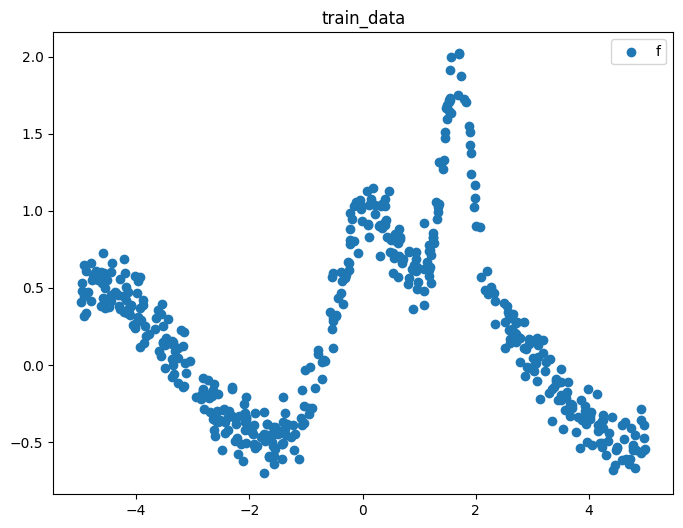

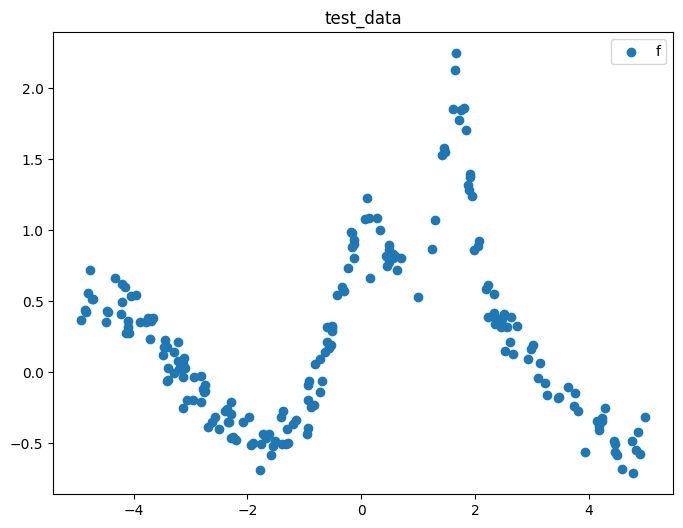

In [33]:
# Визуализация данных
plot_model(X_train, np.array([y_train]), 'train_data', 'f(x)')
plot_model(X_test, np.array([y_test]), 'test_data', 'f(x)')

### DecisionTreeRegressor
Настроим модель `DecisionTreeRegressor` с разными параметрами `max_depth` для решения задачи регрессии.

In [34]:
reg_tree_pred_list = []
max_depth_list = [2,5,8,10]
models_list = []

for depth in max_depth_list:
    # Создание объекта DecisionTreeRegressor
    reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    # Обучение модели
    reg_tree.fit(X_train, y_train)
    # Прогноз модели на X_test
    reg_tree_pred_list.append(reg_tree.predict(X_test))
    models_list.append(reg_tree)

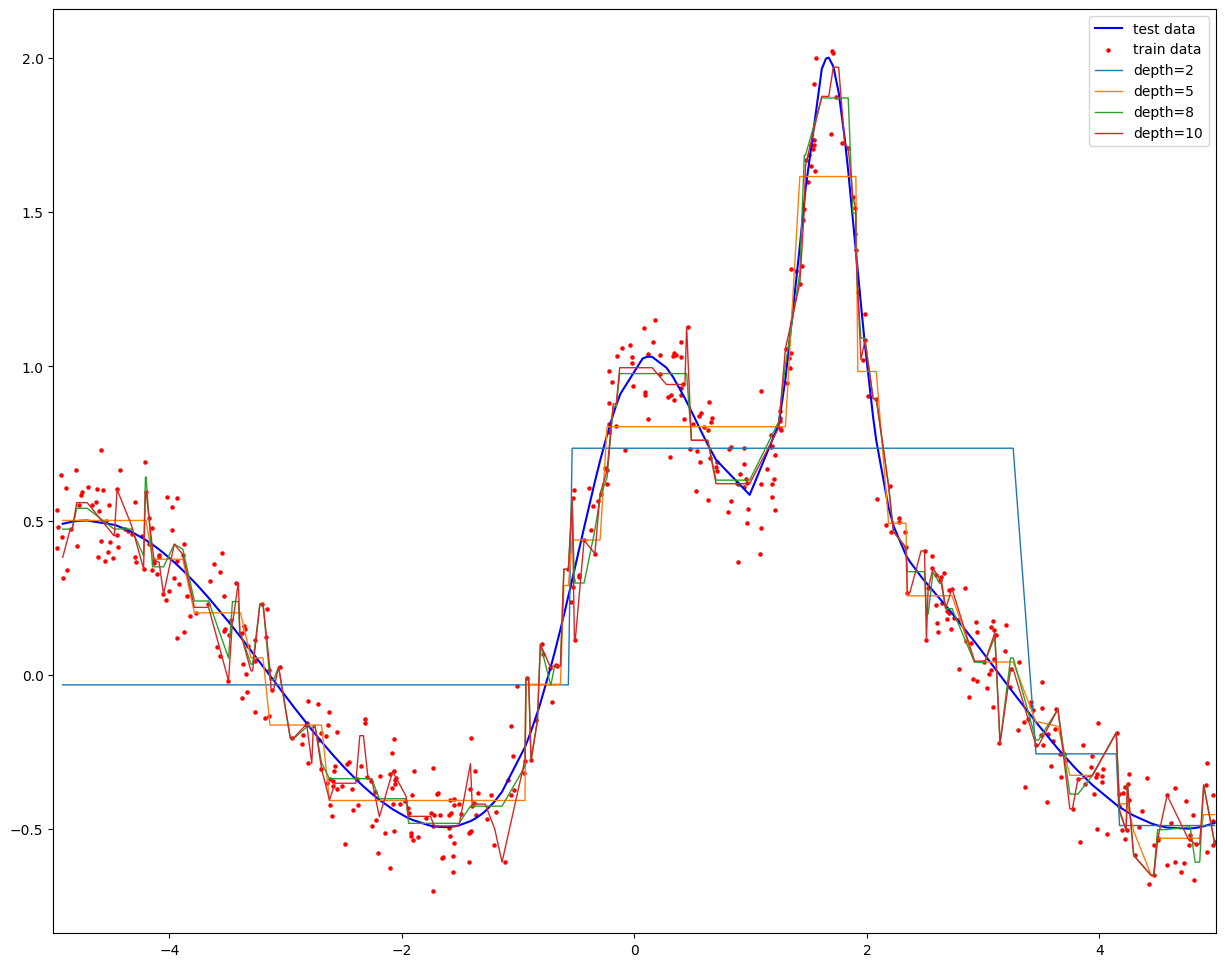

In [35]:
# Визуализация результатов
plt.figure(figsize=(15, 12))
# Тестовые точки
plt.plot(X_test, f(X_test), "b")
# Обучающая выборка
plt.scatter(X_train, y_train, c="r", s=5)

for idx, reg_tree_pred in enumerate(reg_tree_pred_list):
    plt.plot(X_test, reg_tree_pred, lw=1)

plt.xlim([-5, 5])
plt.legend(['test data','train data','depth=2','depth=5','depth=8','depth=10'])
plt.show()

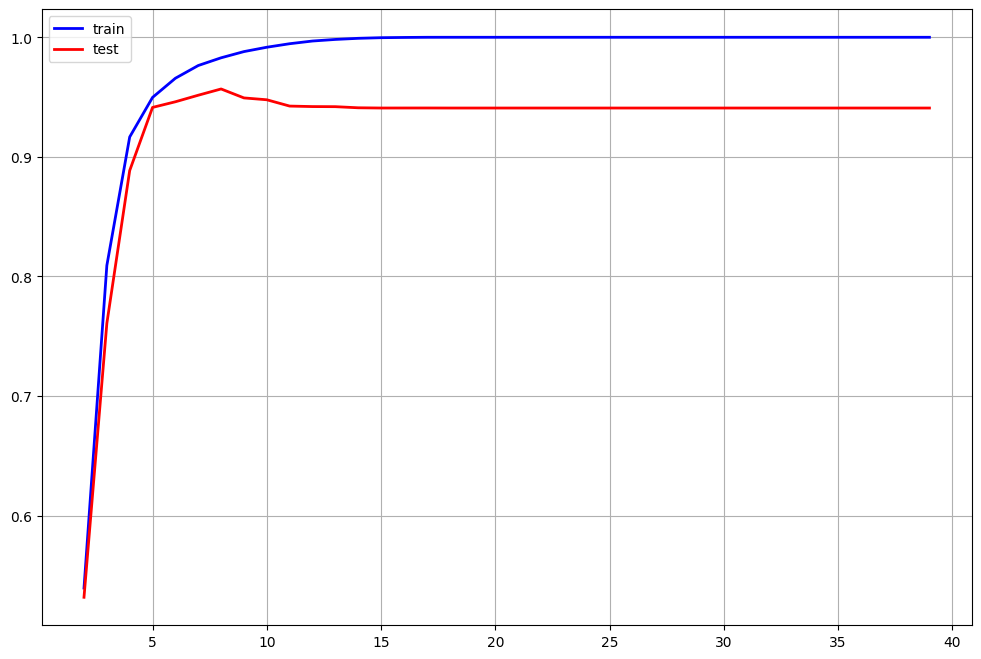

In [36]:
metrics_train = []
metrics_test = []
for depth in range(2,40):
    # Создание объекта DecisionTreeRegressor
    reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    # Обучение модели
    reg_tree.fit(X_train, y_train)
    # Прогноз модели на X_test
    metrics_train.append(reg_tree.score(X_train, y_train))
    metrics_test.append(reg_tree.score(X_test, y_test))
    
plt.figure(figsize=(12,8))
plt.plot(range(2,40),metrics_train, color='b',lw=2)
plt.plot(range(2,40),metrics_test, color='r',lw=2)
plt.legend(['train', 'test'])
plt.grid()
plt.show()

Как мы и изучали в теории, увеличение глубины дерева ведет к переобучению.

> # Задание
>
> Какая глубина дерева наиболее оптимальна?

## RandomForestRegressor

А теперь давайте посмотрим на объединение нескольких деревьев в случайный лес

In [37]:
rand_forest_pred_list = []
max_depth_list = [3,7]
n_est_list = [50,200]
models_list = []

for n_est in n_est_list:
    for depth in max_depth_list:
        # Создание объекта DecisionTreeRegressor
        reg_forest = RandomForestRegressor(n_estimators=n_est,max_depth=depth, random_state=42)
        # Обучение модели
        reg_forest.fit(X_train, y_train)
        # Прогноз модели на X_test
        rand_forest_pred_list.append(reg_tree.predict(X_test))
        models_list.append(reg_tree)

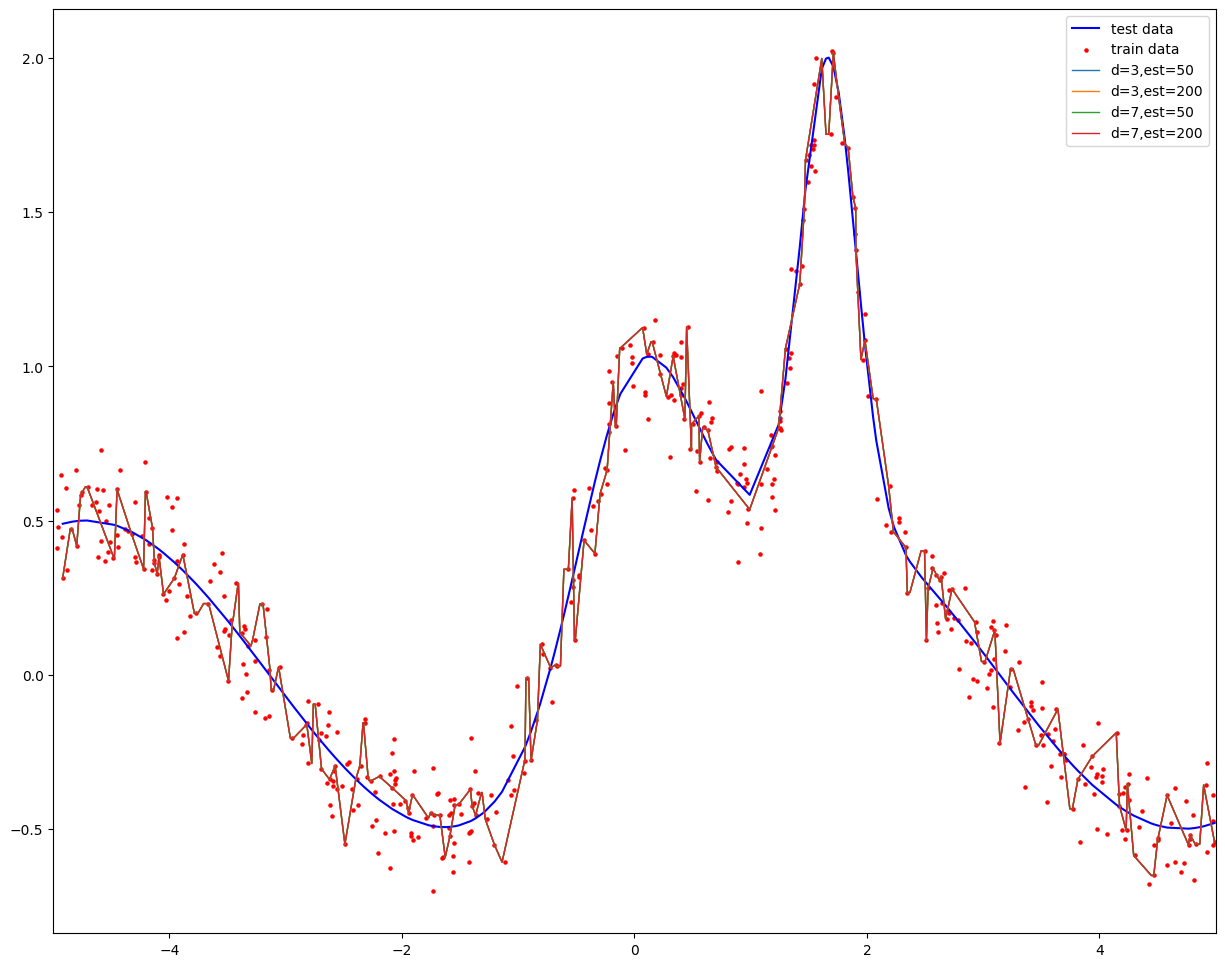

In [38]:
# Визуализация результатов
plt.figure(figsize=(15, 12))
# Тестовые точки
plt.plot(X_test, f(X_test), "b")
# Обучающая выборка
plt.scatter(X_train, y_train, c="r", s=5)

for idx, rand_forest_pred in enumerate(rand_forest_pred_list):
    plt.plot(X_test, rand_forest_pred, lw=1)

plt.xlim([-5, 5])
plt.legend(['test data','train data','d=3,est=50','d=3,est=200','d=7,est=50','d=7,est=200'])
plt.show()

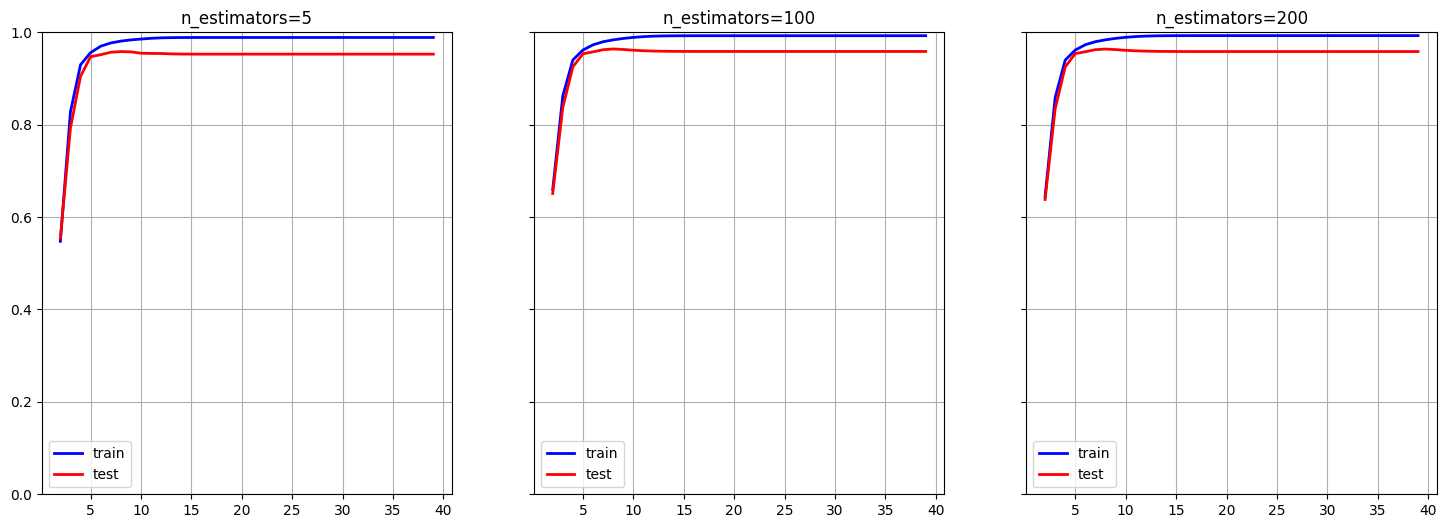

In [39]:
metrics_train = []
metrics_test = []
for n_est in [5,100,200]:
    cur_metric_train = []
    cur_metric_test = []
    for depth in range(2,40):
        # Создание объекта DecisionTreeRegressor
        reg_rf = RandomForestRegressor(n_estimators=n_est,max_depth=depth, random_state=42)
        # Обучение модели
        reg_rf.fit(X_train, y_train)
        # Прогноз модели на X_test
        cur_metric_train.append(reg_rf.score(X_train, y_train))
        cur_metric_test.append(reg_rf.score(X_test, y_test))
        
    metrics_train.append(cur_metric_train)
    metrics_test.append(cur_metric_test)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18,6))
i=0
for tr, te in zip(metrics_train, metrics_test):  
    [ax1,ax2,ax3][i].plot(range(2,40),tr, color='b',lw=2)
    [ax1,ax2,ax3][i].plot(range(2,40),te, color='r',lw=2)
    [ax1,ax2,ax3][i].set_title(f'n_estimators={[5,100,200][i]}')
    [ax1,ax2,ax3][i].legend(['train', 'test'])
    [ax1,ax2,ax3][i].grid()
    [ax1,ax2,ax3][i].set_ylim([0, 1])
    i+=1

## Классификация

Рассмотрим задачу классификации на привычном наборе данных про цветы Ириса

### Датасет
Рассматривать задачу будем на примере известного датасета **Цветки Ириса**

Датасет [Цветки Ириса](https://archive.ics.uci.edu/ml/datasets/iris) содержит 150 записей, каждая из записей содержит 4 признака, т.е. $\boldsymbol x \in \mathbb{R}^4$. 

Что за 4 признака?

0. длина чашелистника, см
1. ширина чашелистника, см
2. длина лепестка, см 
3. ширина лепестка, см 

Метки классов

0. Setosa
1. Versicolour 
2. Virginica

In [40]:
# Функция для отображения границ классов по модели
def plot_contours(X_train, X_test, y_test, model, title):
    h = .02  # шаг сетки
    # Создадим сетку для отображения
    x_min, x_max = X_test[:, 0].min()*0.9, X_test[:, 0].max()*1.1
    y_min, y_max = X_test[:, 1].min()*0.9, X_test[:, 1].max()*1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
    y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # "Восстановим" прогнозные точки на новой сетке
    y_pred = y_pred.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.seismic, alpha=0.8)

    # Добавим на график точки из датасета
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.seismic)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title(title)

In [41]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=21)

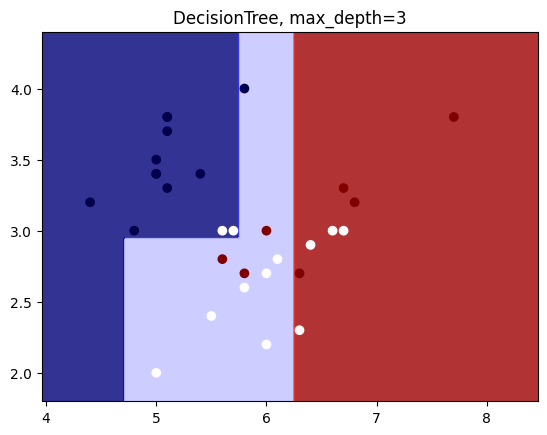

In [42]:
# создадим объект
dtree_class = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# обучим модель
dtree_class.fit(X_train, y_train)

# визуализируем границы
plot_contours(X_train, X_test, y_test, dtree_class, 'DecisionTree, max_depth=3')

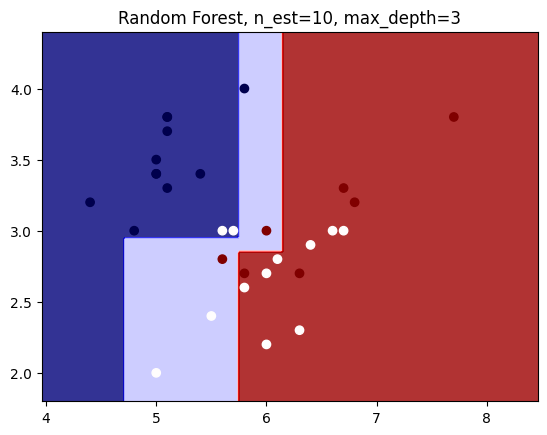

In [43]:
# создадим объект
rf_class = RandomForestClassifier(n_estimators=2, criterion='entropy', max_depth=3)

# обучим модель
rf_class.fit(X_train, y_train)

# визуализируем границы
plot_contours(X_train, X_test, y_test, rf_class, 'Random Forest, n_est=10, max_depth=3')

In [44]:
print(f'Точность решающего дерева: {np.round(dtree_class.score(X_test, y_test),3)}')
print(f'Точность случайного леса: {np.round(rf_class.score(X_test, y_test),3)}')

Точность решающего дерева: 0.667
Точность случайного леса: 0.567


Добавив всего ещё одно дерево, разделяющая плоскость стала намного сложнее и метрика точности модели явно улучшилась.

### Теперь давайте посмотрим на основные параметры Случайного леса

**Число деревьев — n_estimators**

Увеличение количества деревьев влият на улучшение метрики, но в то же время время настройки и работы модели также  увеличиваются.

In [45]:
rf_class_pred_list = []
n_est_list = [2,4,6,10]
models_list = []

for n_est in n_est_list:
    # Создание объекта RandomForest
    rf_class = RandomForestRegressor(n_estimators=n_est,max_depth=depth, random_state=42)
    # Обучение модели
    rf_class.fit(X_train, y_train)
    # Прогноз модели на X_test
    rf_class_pred_list.append(rf_class.predict(X_test))
    models_list.append(rf_class)

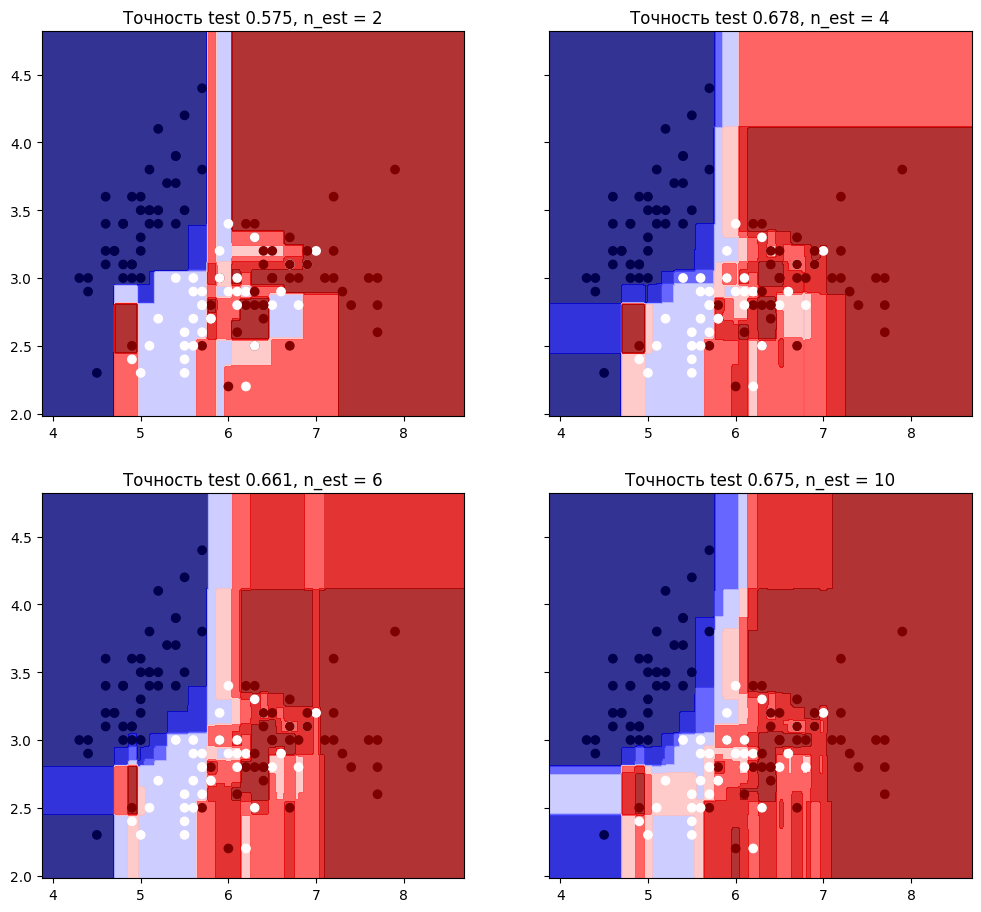

In [46]:
h = .02  # шаг сетки
# Создадим сетку для отображения
x_min, x_max = X_train[:, 0].min()*0.9, X_train[:, 0].max()*1.1
y_min, y_max = X_train[:, 1].min()*0.9, X_train[:, 1].max()*1.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

f, axs = plt.subplots(2, 2, sharey=True, figsize=(12,11))
axs = axs.ravel()

for idx, rf_class in enumerate(models_list):
    y_pred = rf_class.predict(np.c_[xx.ravel(), yy.ravel()])
    # "Восстановим" прогнозные точки на новой сетке
    y_pred = y_pred.reshape(xx.shape)
    axs[idx].contourf(xx, yy, y_pred, cmap=plt.cm.seismic, alpha=0.8)
    # Добавим на график точки из датасета
    axs[idx].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.seismic)
    axs[idx].set_title(f'Точность test {np.round(rf_class.score(X_test, y_test),3)}, n_est = {n_est_list[idx]}')

`max_depth` - **максимальная глубина деревьев**

При увеличении глубины возрастает качество на обучении и на тесте. Рекомендуется использовать максимальную глубину (кроме случаев, когда объектов слишком много и получаются очень глубокие деревья, построение которых занимает значительное время). При использовании неглубоких деревьев изменение параметров, связанных с ограничением числа объектов в листе и для деления, не приводит к значимому эффекту (листья и так получаются «большими»). Неглубокие деревья рекомендуют использовать в задачах с большим числом шумовых объектов (выбросов).

In [47]:
max_depth_list = [2,3,4,5]
models_list = []

for max_depth in max_depth_list:
    # Создание объекта RandomForest
    rf_class = RandomForestRegressor(n_estimators=5,max_depth=max_depth, random_state=42)
    # Обучение модели
    rf_class.fit(X_train, y_train)
    models_list.append(rf_class)

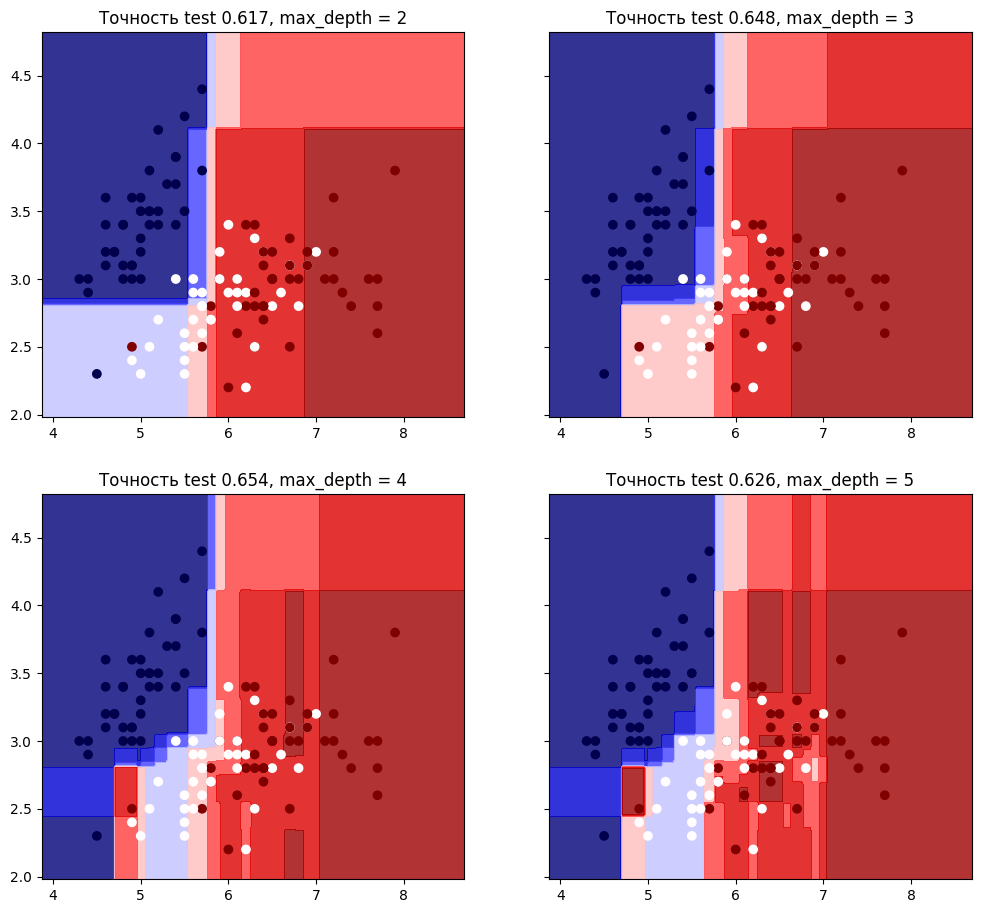

In [48]:
h = .02  # шаг сетки
# Создадим сетку для отображения
x_min, x_max = X_train[:, 0].min()*0.9, X_train[:, 0].max()*1.1
y_min, y_max = X_train[:, 1].min()*0.9, X_train[:, 1].max()*1.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

f, axs = plt.subplots(2, 2, sharey=True, figsize=(12,11))
axs = axs.ravel()

for idx, rf_class in enumerate(models_list):
    y_pred = rf_class.predict(np.c_[xx.ravel(), yy.ravel()])
    # "Восстановим" прогнозные точки на новой сетке
    y_pred = y_pred.reshape(xx.shape)
    axs[idx].contourf(xx, yy, y_pred, cmap=plt.cm.seismic, alpha=0.8)
    # Добавим на график точки из датасета
    axs[idx].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.seismic)
    axs[idx].set_title(f'Точность test {np.round(rf_class.score(X_test, y_test),3)}, max_depth = {max_depth_list[idx]}')

**Число признаков для выбора расщепления — max_features**

График качества на тесте от значения этого праметра унимодальный, на обучении он строго возрастает. При увеличении max_features увеличивается время построения леса, а деревья становятся «более однообразными». По умолчанию он равен sqrt(n) в задачах классификации и n/3 в задачах регрессии. Это самый важный параметр! Его настраивают в первую очередь (при достаточном числе деревьев в лесе).

In [49]:
max_features_list = [1,2]
models_list = []

for max_features in max_features_list:
    # Создание объекта RandomForest
    rf_class = RandomForestRegressor(n_estimators=5,max_depth=3, max_features= max_features, random_state=42)
    # Обучение модели
    rf_class.fit(X_train, y_train)
    models_list.append(rf_class)

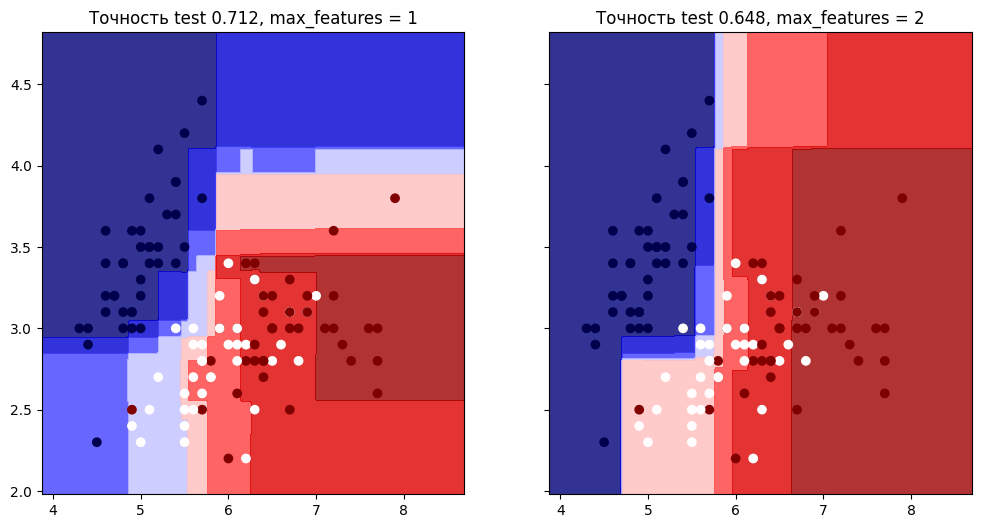

In [50]:
h = .02  # шаг сетки
# Создадим сетку для отображения
x_min, x_max = X_train[:, 0].min()*0.9, X_train[:, 0].max()*1.1
y_min, y_max = X_train[:, 1].min()*0.9, X_train[:, 1].max()*1.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

f, axs = plt.subplots(1, 2, sharey=True, figsize=(12,6))
axs = axs.ravel()

for idx, rf_class in enumerate(models_list):
    y_pred = rf_class.predict(np.c_[xx.ravel(), yy.ravel()])
    # "Восстановим" прогнозные точки на новой сетке
    y_pred = y_pred.reshape(xx.shape)
    axs[idx].contourf(xx, yy, y_pred, cmap=plt.cm.seismic, alpha=0.8)
    # Добавим на график точки из датасета
    axs[idx].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.seismic)
    axs[idx].set_title(f'Точность test {np.round(rf_class.score(X_test, y_test),3)}, max_features = {max_features_list[idx]}')

**Минимальное число объектов, при котором выполняется расщепление — min_samples_split**

Этот параметр, как правило, не очень важный и можно оставить значение по умолчанию (2). График качества на контроле может быть похожим на «расчёску» (нет явного оптимума). При увеличении параметра качество на обучении падает, а время построения RF сокращается.

In [51]:
min_samples_split_list = [2,3,4,5]
models_list = []

for min_samples_split in min_samples_split_list:
    # Создание объекта RandomForest
    rf_class = RandomForestRegressor(n_estimators=5,max_depth=3, min_samples_split=min_samples_split, random_state=42)
    # Обучение модели
    rf_class.fit(X_train, y_train)
    models_list.append(rf_class)

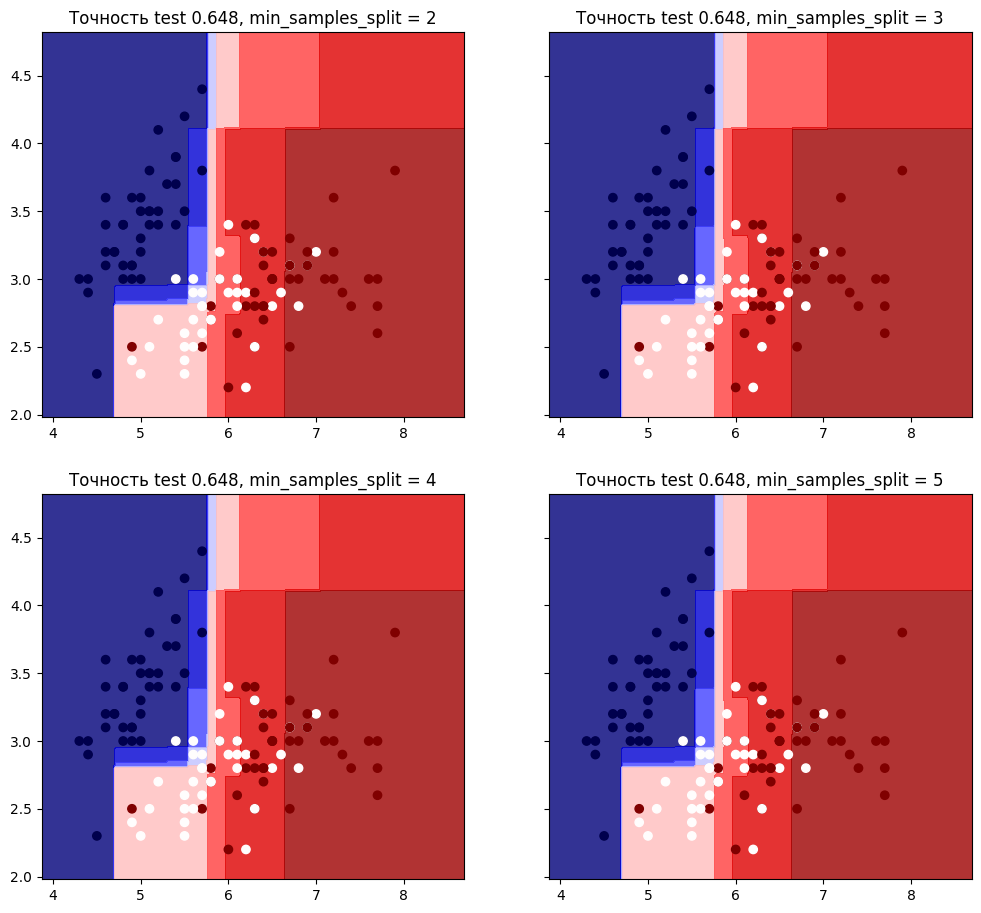

In [52]:
h = .02  # шаг сетки
# Создадим сетку для отображения
x_min, x_max = X_train[:, 0].min()*0.9, X_train[:, 0].max()*1.1
y_min, y_max = X_train[:, 1].min()*0.9, X_train[:, 1].max()*1.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

f, axs = plt.subplots(2, 2, sharey=True, figsize=(12,11))
axs = axs.ravel()

for idx, rf_class in enumerate(models_list):
    y_pred = rf_class.predict(np.c_[xx.ravel(), yy.ravel()])
    # "Восстановим" прогнозные точки на новой сетке
    y_pred = y_pred.reshape(xx.shape)
    axs[idx].contourf(xx, yy, y_pred, cmap=plt.cm.seismic, alpha=0.8)
    # Добавим на график точки из датасета
    axs[idx].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.seismic)
    axs[idx].set_title(f'Точность test {np.round(rf_class.score(X_test, y_test),3)}, min_samples_split = {min_samples_split_list[idx]}')

**Ограничение на число объектов в листьях — min_samples_leaf**

Всё, что было описано про min_samples_split, годится и для описания этого параметра. Часто можно оставить значение по умолчанию (1). Кстати, по классике, в задачах регрессии рекомендуется использовать значение 5 (в библиотеке randomForest для R так и реализовано, в sklearn — 1).

In [53]:
min_samples_leaf_list = [2,3,4,5]
models_list = []

for min_samples_leaf in min_samples_leaf_list:
    # Создание объекта RandomForest
    rf_class = RandomForestRegressor(n_estimators=5,max_depth=3, min_samples_leaf=min_samples_leaf, random_state=42)
    # Обучение модели
    rf_class.fit(X_train, y_train)
    models_list.append(rf_class)

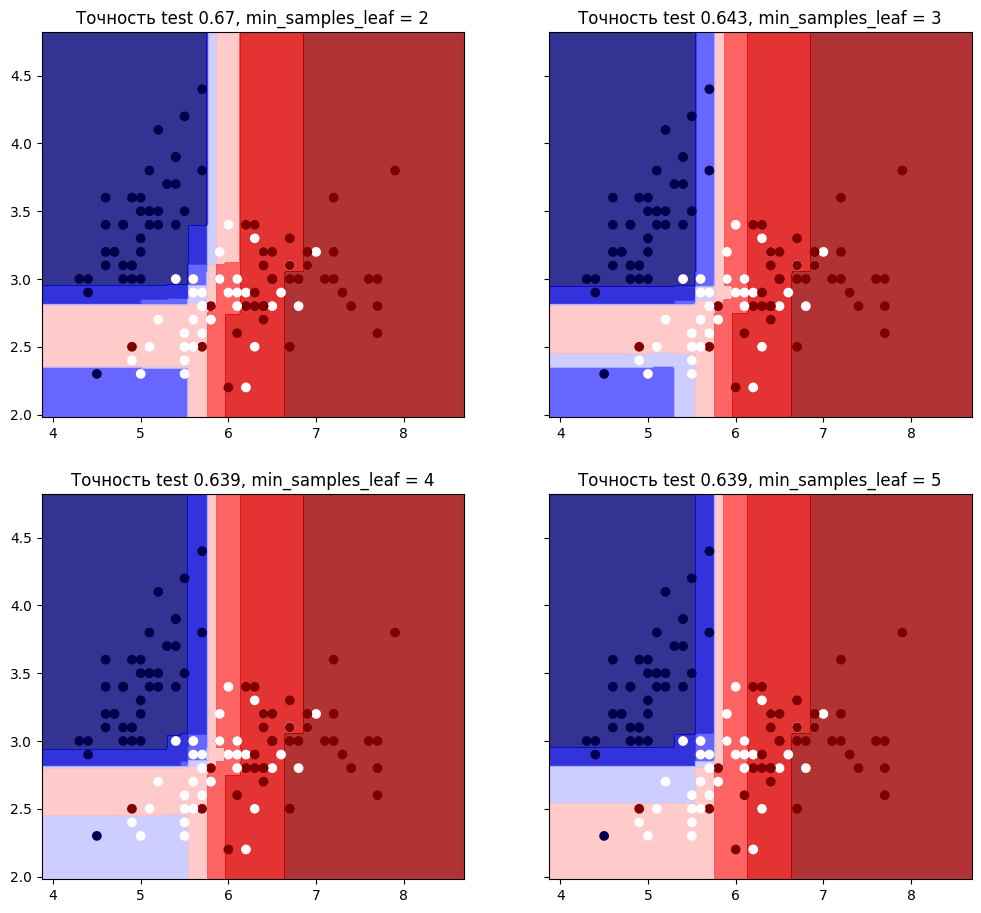

In [54]:
h = .02  # шаг сетки
# Создадим сетку для отображения
x_min, x_max = X_train[:, 0].min()*0.9, X_train[:, 0].max()*1.1
y_min, y_max = X_train[:, 1].min()*0.9, X_train[:, 1].max()*1.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

f, axs = plt.subplots(2, 2, sharey=True, figsize=(12,11))
axs = axs.ravel()

for idx, rf_class in enumerate(models_list):
    y_pred = rf_class.predict(np.c_[xx.ravel(), yy.ravel()])
    # "Восстановим" прогнозные точки на новой сетке
    y_pred = y_pred.reshape(xx.shape)
    axs[idx].contourf(xx, yy, y_pred, cmap=plt.cm.seismic, alpha=0.8)
    # Добавим на график точки из датасета
    axs[idx].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.seismic)
    axs[idx].set_title(f'Точность test {np.round(rf_class.score(X_test, y_test),3)}, min_samples_leaf = {min_samples_leaf_list[idx]}')

# XGBoost

Вот и настало время посмотреть на самую распространенную в сфере ML/DS библиотеку для решения прикладных задач - [XGBoost](https://xgboost.readthedocs.io/en/stable/).

In [55]:
pip install -U xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
# Запустите код ниже, если библиотека XGboost не установлена
#!pip install xgboost

import numpy as np 
import pandas as pd 
import csv as csv
from xgboost import plot_importance, XGBRegressor, XGBRFClassifier

from sklearn.model_selection import cross_val_score,KFold

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV  

from scipy.stats import skew
from collections import OrderedDict

В основе `XGBoost` лежит алгоритм градиентного бустинга деревьев решений. Градиентный бустинг — это техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений. Обучение ансамбля проводится последовательно в отличие, например от бэггинга. На каждой итерации вычисляются отклонения предсказаний уже обученного ансамбля на обучающей выборке. Следующая модель, которая будет добавлена в ансамбль будет предсказывать эти отклонения. Таким образом, добавив предсказания нового дерева к предсказаниям обученного ансамбля мы можем уменьшить среднее отклонение модели, которое является таргетом оптимизационной задачи. Новые деревья добавляются в ансамбль до тех пор, пока ошибка уменьшается, либо пока не выполняется одно из правил "ранней остановки".

In [57]:
# Объем обучающей выборки = 300
n_train = 500     
# объём тестовой выборки = 1000
n_test = 200
# Влияние шума
noise = 0.1

# Аппроксимируемая функция
def f(x):
    return np.exp(-2*x ** 2) + 1.5 * np.exp(-(3*x - 5) ** 2) + 0.5 * np.sin(x)

# Добавим к функции немного шума
def f_noise(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-2*X ** 2) + 1.5 * np.exp(-(3*X - 5) ** 2) + 0.5 * np.sin(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y
    
def plot_model(X, y, title, labels):
    plt.figure(figsize=(8,6))
    for _ in range(y.shape[0]):
        plt.scatter(X,y[_])
        plt.title(title)
        plt.legend(labels)
    plt.show()

In [58]:
# Генерация точек
X_train, y_train = f_noise(n_samples=n_train, noise=noise)
X_test, y_test = f_noise(n_samples=n_test, noise=noise)

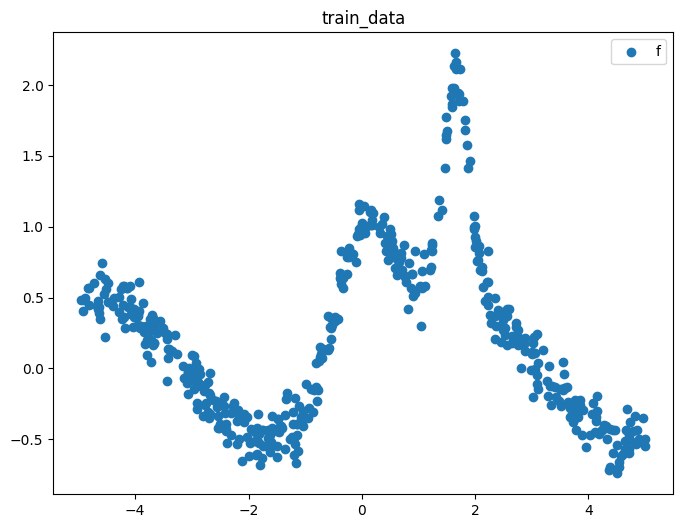

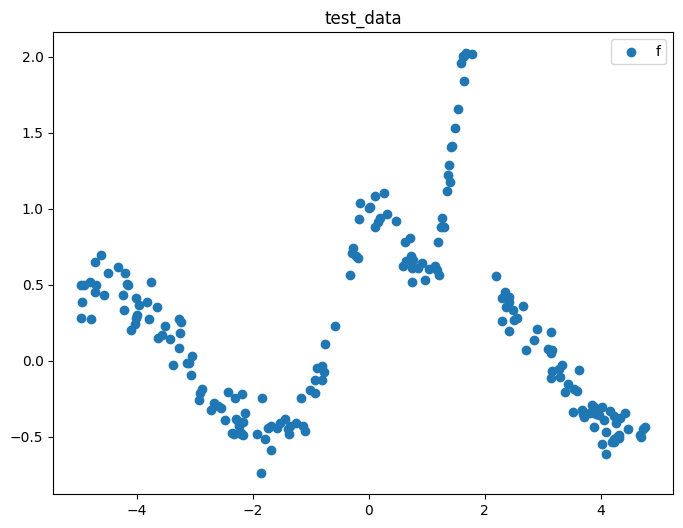

In [59]:
# Визуализация данных
plot_model(X_train, np.array([y_train]), 'train_data', 'f(x)')
plot_model(X_test, np.array([y_test]), 'test_data', 'f(x)')

### XGBoostRegressor
Настроим модель `XGBoostRegressor`.

In [60]:
xgb_reg = XGBRegressor(max_depth=depth, random_state=42)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=39, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [61]:
xgb_reg_pred_list = []
max_depth_list = [2,3,4,6]
models_list = []

for depth in max_depth_list:
    # Создание объекта DecisionTreeRegressor
    xgb_reg = XGBRegressor(max_depth=depth, random_state=42)
    # Обучение модели
    xgb_reg.fit(X_train, y_train)
    # Прогноз модели на X_test
    xgb_reg_pred_list.append(xgb_reg.predict(X_test))
    models_list.append(xgb_reg)

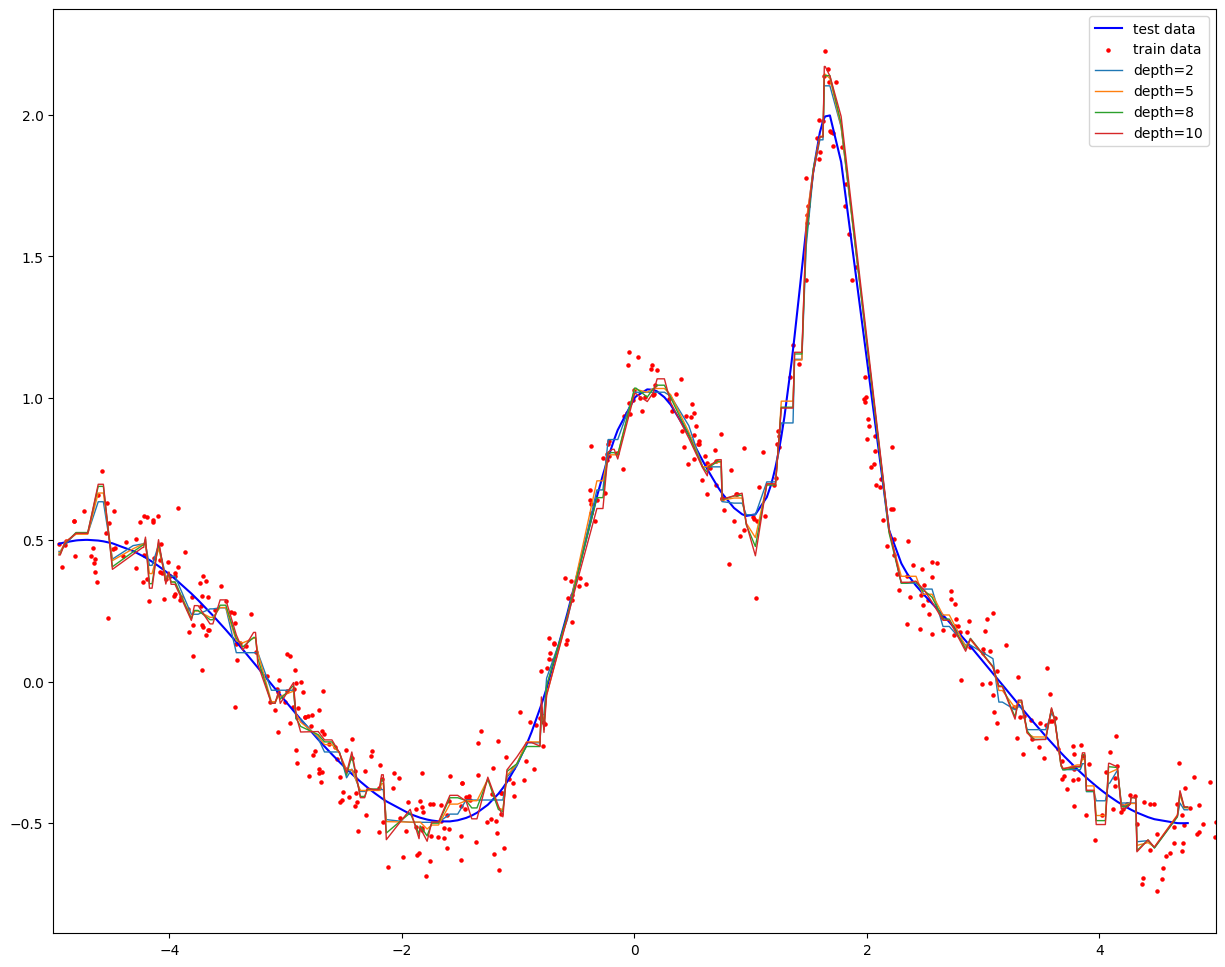

In [62]:
# Визуализация результатов
plt.figure(figsize=(15, 12))
# Тестовые точки
plt.plot(X_test, f(X_test), "b")
# Обучающая выборка
plt.scatter(X_train, y_train, c="r", s=5)

for idx, xgb_reg_pred in enumerate(xgb_reg_pred_list):
    plt.plot(X_test, xgb_reg_pred, lw=1)

plt.xlim([-5, 5])
plt.legend(['test data','train data','depth=2','depth=5','depth=8','depth=10'])
plt.show()

> # Задание
>
> Проведите анализ по гиперпараметрам XGBoost для решения задачи регрессии по аналогии и исследованием RandomForest. Список гиперпараметров: `max_depth`, `n_estimators`

## XGBoost классификация

Теперь применим `XGBoost` для задачи по цифрам `MNIST`. Предварительно снизим размерность точек до 2 и далее применим алгоритм `XGBoost`.

In [63]:
digits = datasets.load_digits()
X_mnist = digits.data
y_mnist = digits.target

/tmp/ipykernel_150408/3936053839.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


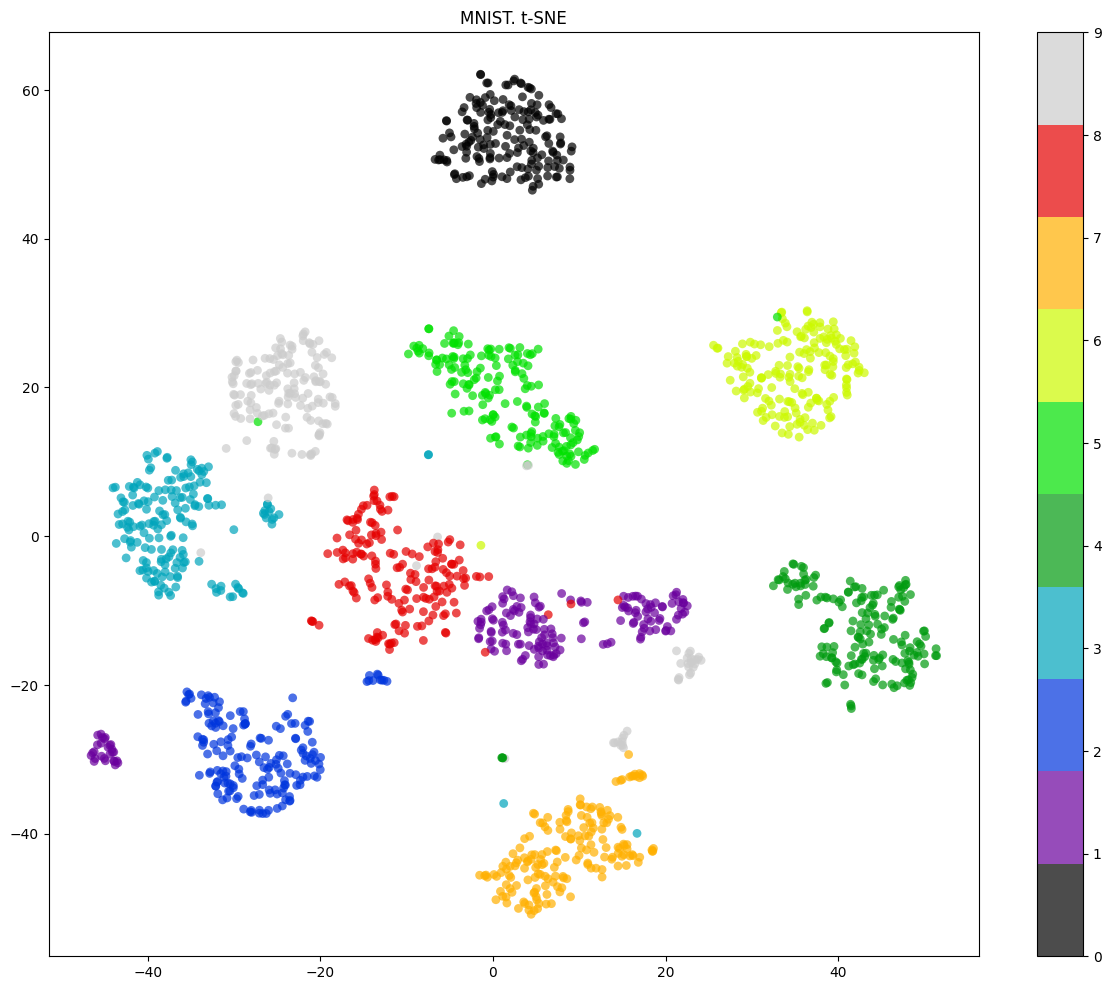

In [64]:
# Создадим объект TSNE
tSNE_mnist = TSNE(random_state=17)

# настройка модели
X_mnist_tsne = tSNE_mnist.fit_transform(X_mnist)

# визуализация данных
plt.figure(figsize=(15,12))
plt.scatter(X_mnist_tsne[:, 0], X_mnist_tsne[:, 1], c=y_mnist, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE');

In [65]:
xgb = XGBRFClassifier(random_state=42, max_depth=2, n_estimators=10)

X_2d_train, X_2d_test, y_train, y_test = train_test_split(X_mnist_tsne, y_mnist, test_size=.2, random_state=42)

xgb.fit(X_2d_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=2, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=10, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=42, reg_alpha=None, ...)

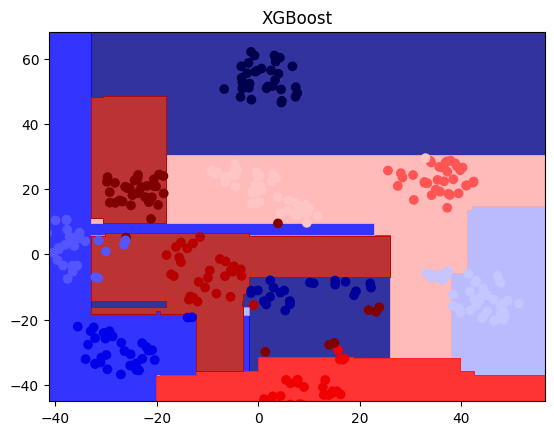

In [66]:
plot_contours(X_2d_train, X_2d_test, y_test, xgb, 'XGBoost')

In [67]:
# Сделаем прогноз
xgb.predict(X_2d_test)

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 1, 4, 0, 4, 2, 3, 7, 8, 8, 6, 3,
       9, 7, 5, 6, 8, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 8, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 6, 3, 5, 3, 1, 8, 5, 1, 6, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 1, 0, 6, 6, 4, 2, 8, 0, 9, 6, 6, 9, 1, 6, 9, 0, 8, 5, 6, 6, 0,
       6, 4, 8, 9, 3, 1, 7, 2, 9, 0, 4, 5, 8, 6, 5, 1, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 6, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 6, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 1, 3, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 6, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 8, 3, 2, 0, 5, 8, 3, 6, 0, 2,

## Успешность алгоритма

Посмотрим на матрицу неточностей. По оси Y - реальные метки, по X - результат модели. В идеале, все точки д.б. на главной диагонали, если какие-то значения вне главной диагонали, значит, классификатор не верно отнес цифру.

In [68]:
confusion_matrix(xgb.predict(X_2d_test),y_test)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  1,  1,  6],
       [ 0,  2, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  1, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  6,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 32]])

> # Задание
>
> При помощи `GridSearchCV` определите оптимальный набор параметров для выделения цифр. Постройте графики точности от значения параметров

In [70]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [2,5,7,10],
    'n_estimators': [5,10,50,200], # add your parameters
}

xgb = XGBRFClassifier(random_state=42)

# создаем объект GridSearchCV
clf = GridSearchCV(xgb, param_grid=parameters, cv=3)

# обучаем модель
clf.fit(X_2d_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max_cat_to_onehot=None,
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=42, reg_alpha=None, ...),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [5, 10, 50, 200]})